# CS235 - Default of Credit Card Client Classification

Data source: https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

Notebook Authors: 
- Dan O'Connor
- Shirin Afshar
- Alexander Hartley

In [304]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [305]:
# needed to open .xls (old excel format) file 
!pip install xlrd

In [306]:
# load in data
df = pd.read_excel('Data/default of credit card clients.xls', skiprows=1)

## Data Overview

In [307]:
df.shape

(30000, 25)

In [308]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [309]:
# all data type is int
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

## Data Cleaning

In [310]:
# reset the index to 'ID'
df = df.set_index('ID')

In [311]:
# no missing values
df.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [312]:
# appears to be some duplicated items
# considering there is no personal information, only general demographic and credit
# it is quite possible the duplicates have identical info and are different people, therefore will leave them
df.duplicated().sum()

35

## Statistical Summary, Feature Descriptions, Distributions, and Correlations

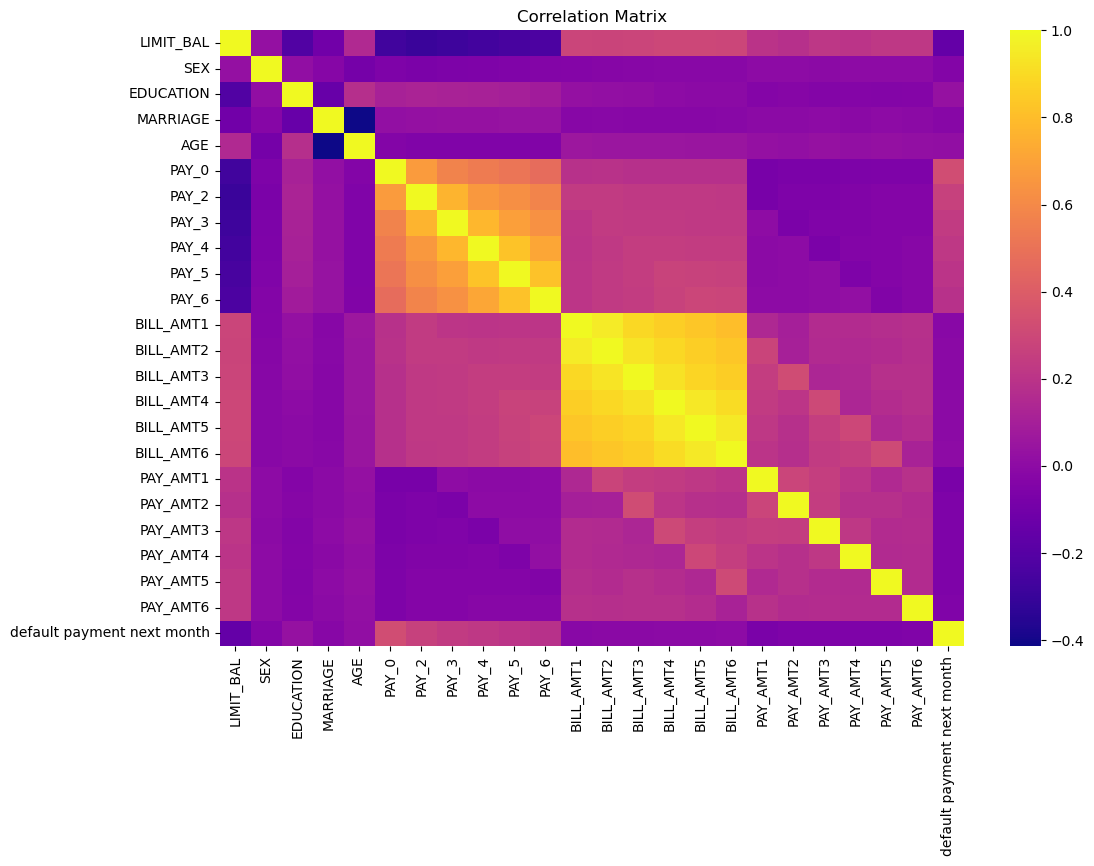

In [313]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='plasma')
plt.title("Correlation Matrix")
plt.show()

In [314]:
#easier to copy/paste 
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [315]:
#Looking at the distribution of each feature:

limit_col = ['LIMIT_BAL']

demographic_dis = ['SEX', 'EDUCATION', 'MARRIAGE']
demographic_con = ['AGE']

pay_delay_cols = ['PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

bill_cols = ['BILL_AMT1', 'BILL_AMT2',  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

payments_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

target_col = ['default payment next month']

# #discrete values
# dis_cols = ['SEX','EDUCATION', 'MARRIAGE',  'PAY_0', 'PAY_2','PAY_3',
#             'PAY_4', 'PAY_5', 'PAY_6','default payment next month'] 

In [316]:
#helper functions to help plot features
def plot_discrete(df, cols):
    # setting 3 cols
    n_cols = 3
    
    #integer div to check num rows, then check remainder, if yes then add another row
    n_rows = (len(cols) // 3) + (len(cols) % 3 > 0) 
    plt.figure(figsize=(15, n_rows * 4))  
    
    for i, col in enumerate(cols, 1):
        plt.subplot(n_rows, n_cols, i)  #subplot for each col
        sns.countplot(x=col, data=df)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

    
# def plot_continuous(df, cols):
#     # setting 3 cols
#     n_cols = 3
    
#     #integer div to check num rows, then check remainder, if yes then add another row
#     n_rows = (len(cols) // 3) + (len(cols) % 3 > 0)  
#     plt.figure(figsize=(15, n_rows * 4))  #adjust figsize as needed
    
#     for i, col in enumerate(cols, 1):
#         plt.subplot(n_rows, n_cols, i)  #subplot for each column
#         sns.histplot(df[col], kde=True)
#         plt.title(f'Distribution of {col}')
#     plt.tight_layout()
#     plt.show()
    
def plot_continuous(df, cols):
    # setting 3 cols
    n_cols = 3
    
    #int div to check num rows for histograms, then check remainder, if yes then add another row
    #cont vars will have two rows: one for histogram and one for boxplot
    n_rows = 2 * ((len(cols) // 3) + (len(cols) % 3 > 0))  
    plt.figure(figsize=(15, n_rows * 2))  #adjust figsize as needed
    
    for i, col in enumerate(cols):
        # Histogram with KDE
        plt.subplot(n_rows, n_cols, 2*i + 1)  #subplot for each column's histogram
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        
        # Boxplot
        plt.subplot(n_rows, n_cols, 2*i + 2)  #subplot for each column's boxplot
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        
    plt.tight_layout()
    plt.show()

In [317]:
1 % 3

1

### Limit Balance Data

The limit balance represents the amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

 

In [318]:
df[limit_col].describe()

,LIMIT_BAL
count,30000.000000
mean,167484.322667
std,129747.661567
min,10000.000000
25%,50000.000000
50%,140000.000000
75%,240000.000000
max,1000000.000000


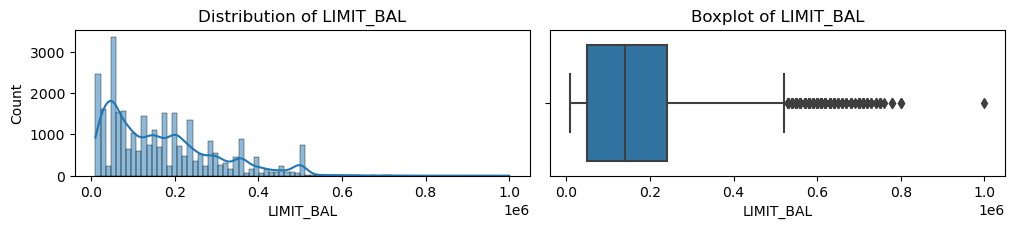

In [319]:
plot_continuous(df, limit_col)

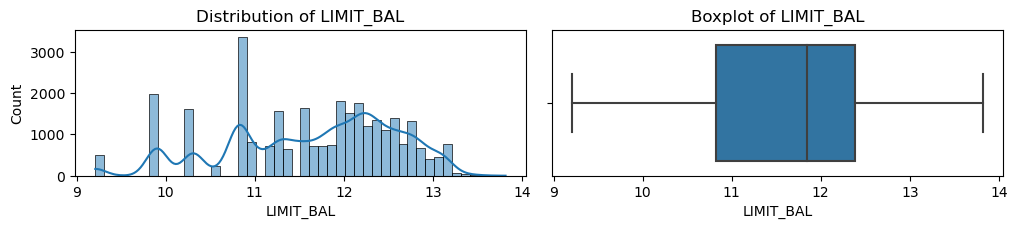

In [320]:
# log transform on Limit Bal 
df[limit_col] = np.log(df[limit_col])
plot_continuous(df, limit_col)

### Demographic Data

- `SEX`
    - 1 = MALE
    - 2 = FEMALE

- `EDUCATION`: Highest level of education completed.
    - 1 = GRADUATE SCHOOL
    - 2 = UNIVERSITY
    - 3 = HIGHSCHOOL
    - 0, 4, 5, 6 = OTHER
    
- `MARRIAGE`:
    - 1 = MARRIED
    - 2 = SINGLE 
    - 3 = DIVORCE
    - 0 = OTHER
    

In [321]:
df[demographic_dis].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


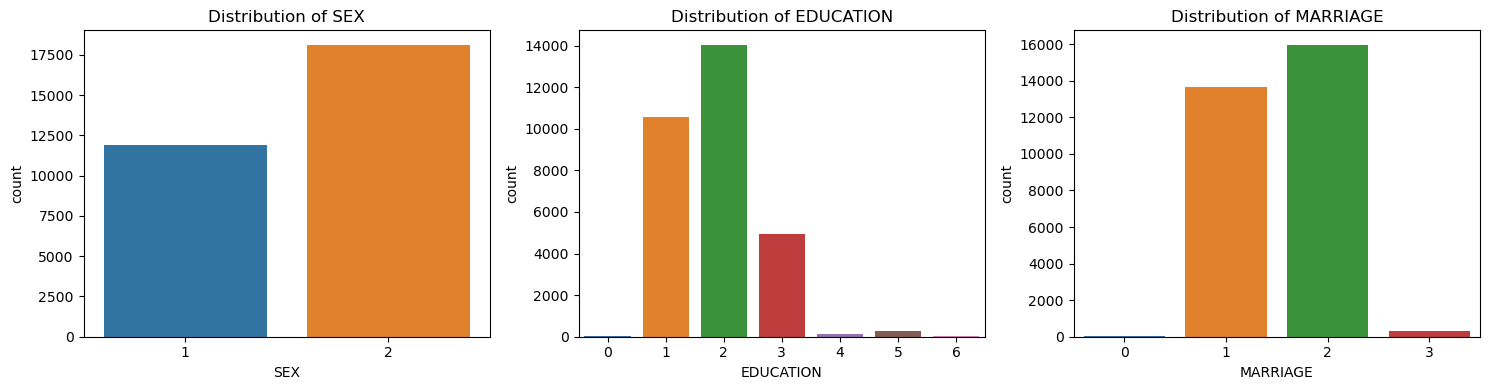

In [322]:
plot_discrete(df, demographic_dis)

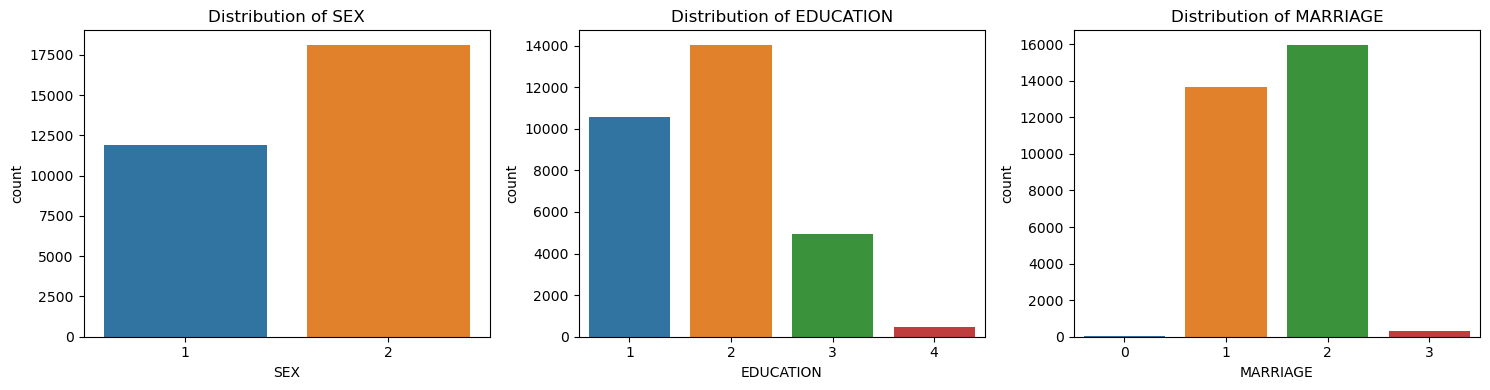

In [323]:
# going to combine the 'other' features
df['EDUCATION'] = df['EDUCATION'].replace([0, 4, 5, 6], 4)
plot_discrete(df, demographic_dis)

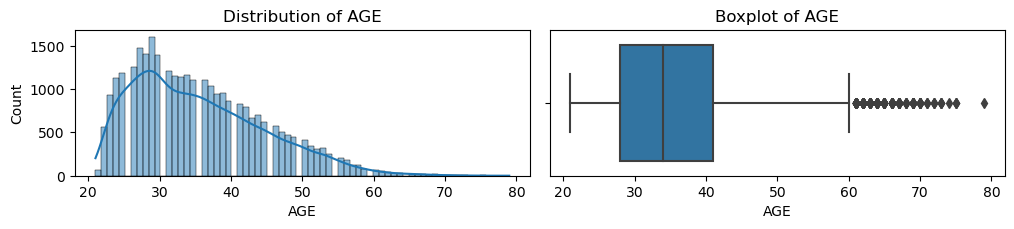

In [324]:
plot_continuous(df, demographic_con)

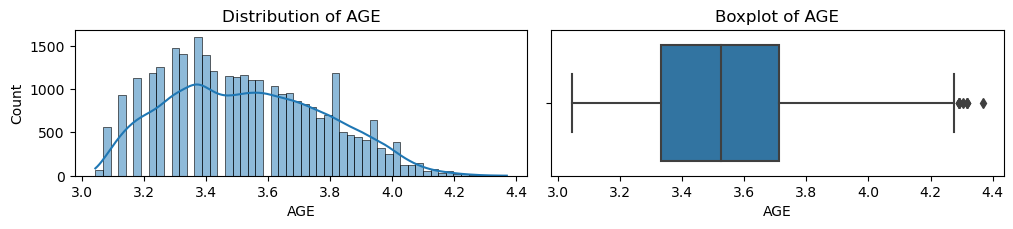

In [325]:
# going to log transform age data
df[demographic_con] = np.log(df[demographic_con])
plot_continuous(df, demographic_con)

### Payment Timeliness Data

Tracks the history of past payments. `PAY_0` corresponds to payment is September up to `PAY_6` corresponding to payment in April. 

  - -2 = NO CONSUMPTION
  - -1 = PAID IN FULL
  - 0 = THE USE OF REVOLVING CREDIT
  - 1-8 = LENGTH OF DELAYED PAYMENT (IN MONTHS)
  - 9 = >= 9 MONTHS DELAYED PAYMENT

In [326]:
df[pay_delay_cols].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


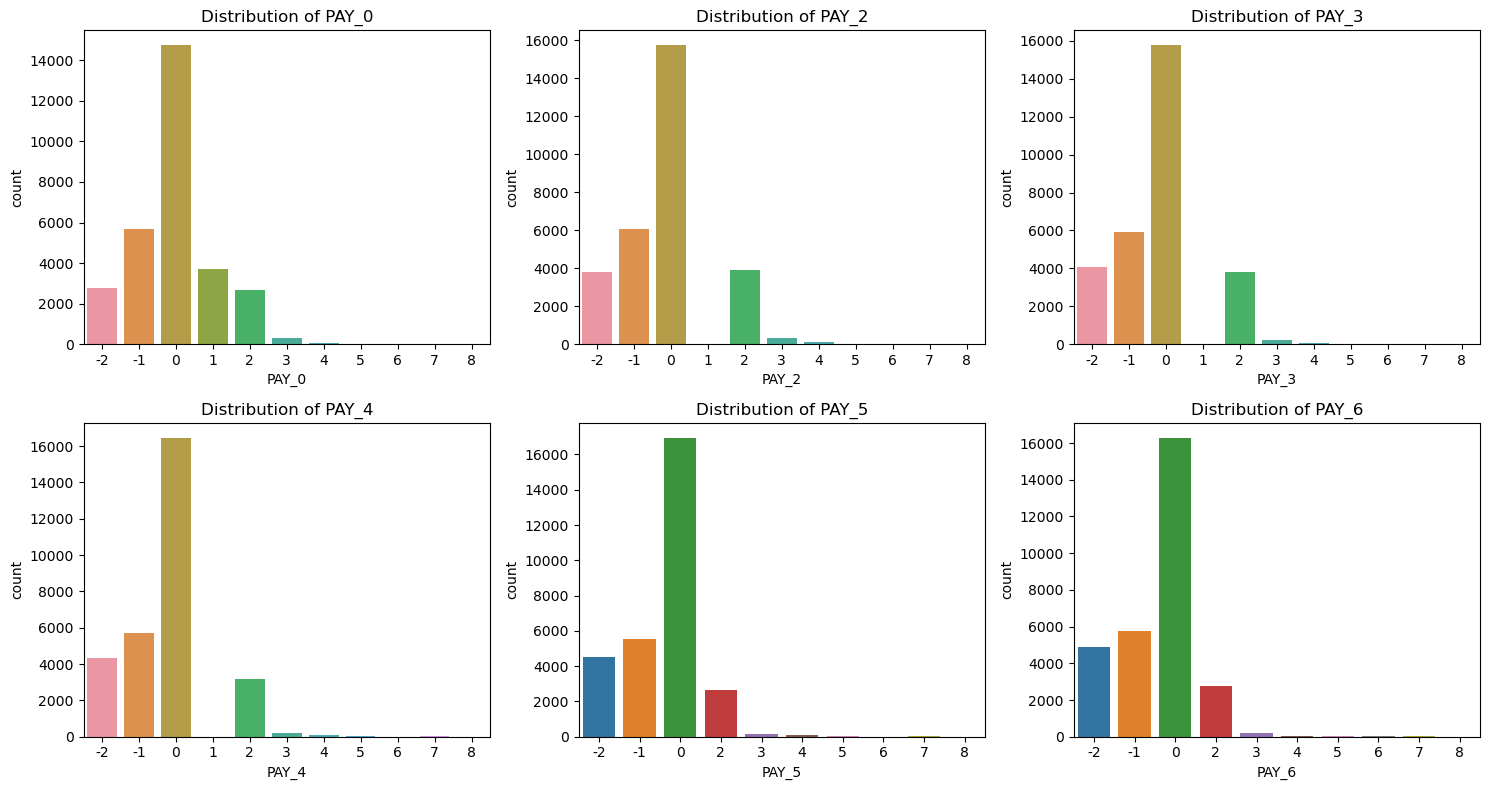

In [327]:
plot_discrete(df, pay_delay_cols)

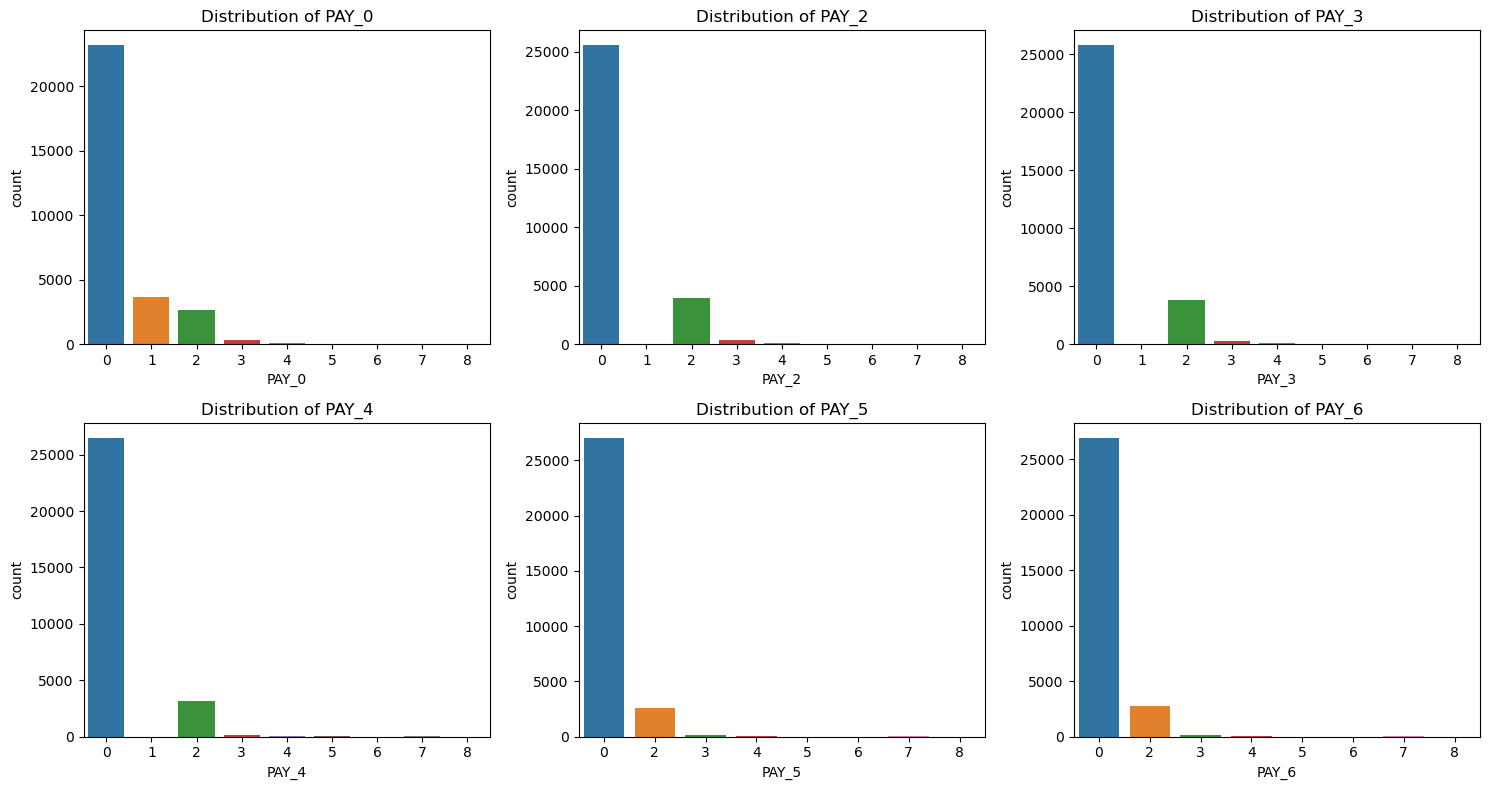

In [328]:
# grouping -2, -1, and 0 all as no delay/on time for simplicity, this maintains ordinal relationship
for i in range(0, 7):
    if f'PAY_{i}' in df.columns: #needed because order goes PAY_0 to PAY_2 ...
        df[f'PAY_{i}'] = df[f'PAY_{i}'].apply(lambda x: 0 if x <= 0 else x)
plot_discrete(df, pay_delay_cols)

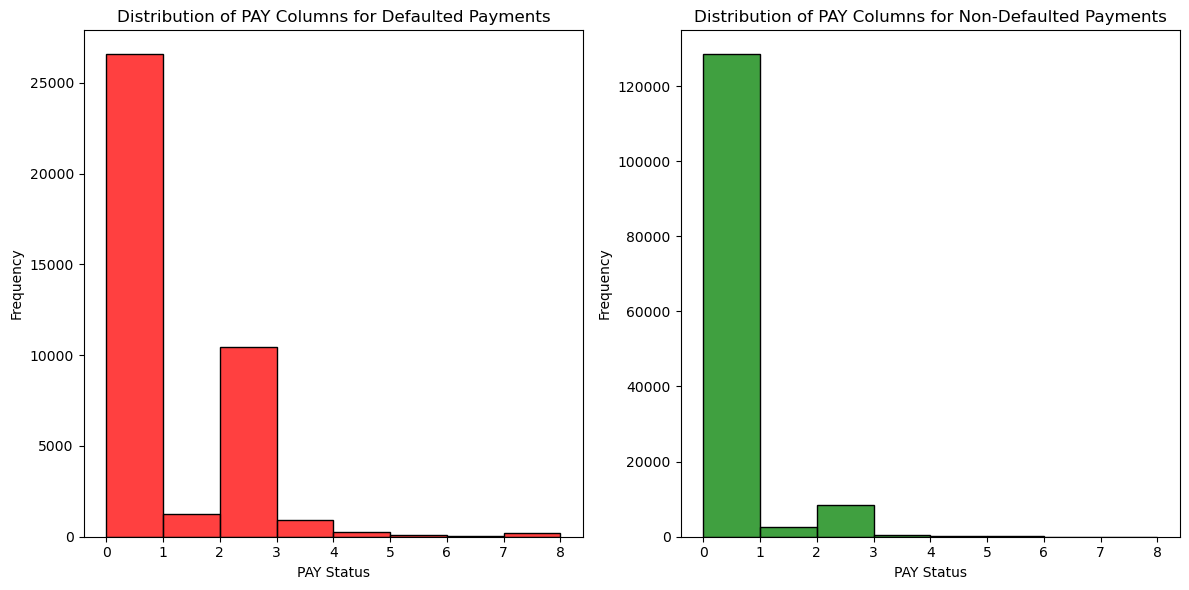

In [329]:
pay_array = df[pay_delay_cols].values.flatten()

defaulted_pay = df[df['default payment next month'] ==1][pay_delay_cols].values.flatten()
non_defaulted_pay = df[df['default payment next month'] ==0][pay_delay_cols].values.flatten()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(defaulted_pay, bins=range(min(pay_array), max(pay_array) + 1), kde=False, ax=axes[0], color='red')
axes[0].set_title('Distribution of PAY Columns for Defaulted Payments')
axes[0].set_xlabel('PAY Status')
axes[0].set_ylabel('Frequency')

sns.histplot(non_defaulted_pay, bins=range(min(pay_array), max(pay_array) + 1), kde=False, ax=axes[1], color='green')
axes[1].set_title('Distribution of PAY Columns for Non-Defaulted Payments')
axes[1].set_xlabel('PAY Status')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [330]:
from scipy import stats

correlations = {}
p_values = {}

for col in pay_delay_cols:
    coef, p_value = stats.spearmanr(df[col], df['default payment next month'])
    correlations[col] = coef
    p_values[col] = p_value

for key in correlations.keys():
    print(f"Spearman Correlation for {key}:\nCoefficient={correlations[key]:.3f}\np-value={p_values[key]:.3e}")
    print(f"{'-'*35}")

Spearman Correlation for PAY_0:
Coefficient=0.391
p-value=0.000e+00
-----------------------------------
Spearman Correlation for PAY_2:
Coefficient=0.338
p-value=0.000e+00
-----------------------------------
Spearman Correlation for PAY_3:
Coefficient=0.294
p-value=0.000e+00
-----------------------------------
Spearman Correlation for PAY_4:
Coefficient=0.276
p-value=0.000e+00
-----------------------------------
Spearman Correlation for PAY_5:
Coefficient=0.268
p-value=0.000e+00
-----------------------------------
Spearman Correlation for PAY_6:
Coefficient=0.247
p-value=0.000e+00
-----------------------------------


### Bill Amount Data

The bill amount statement with `BILL_AMT1` corresponding to September, and `BILL_AMT6` corresponding to April.

In [331]:
df[bill_cols].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


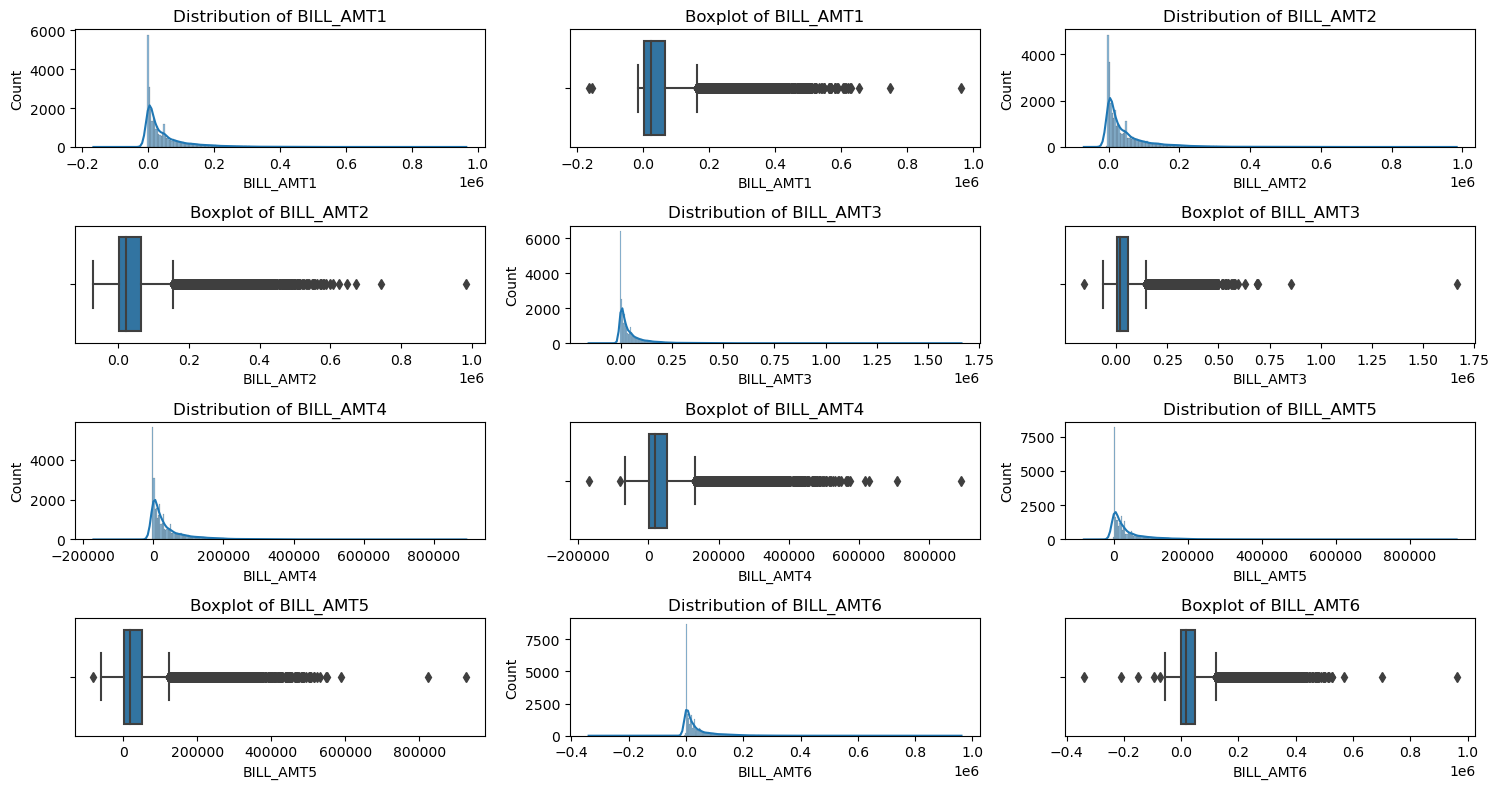

In [332]:
plot_continuous(df, bill_cols)

In [333]:
#num of poeple with negative bill_amt who defaulted,
negative_bill_default_mask = (df[bill_cols] < 0).any(axis=1) & (df['default payment next month'] == 1)
df[negative_bill_default_mask].shape[0]




318

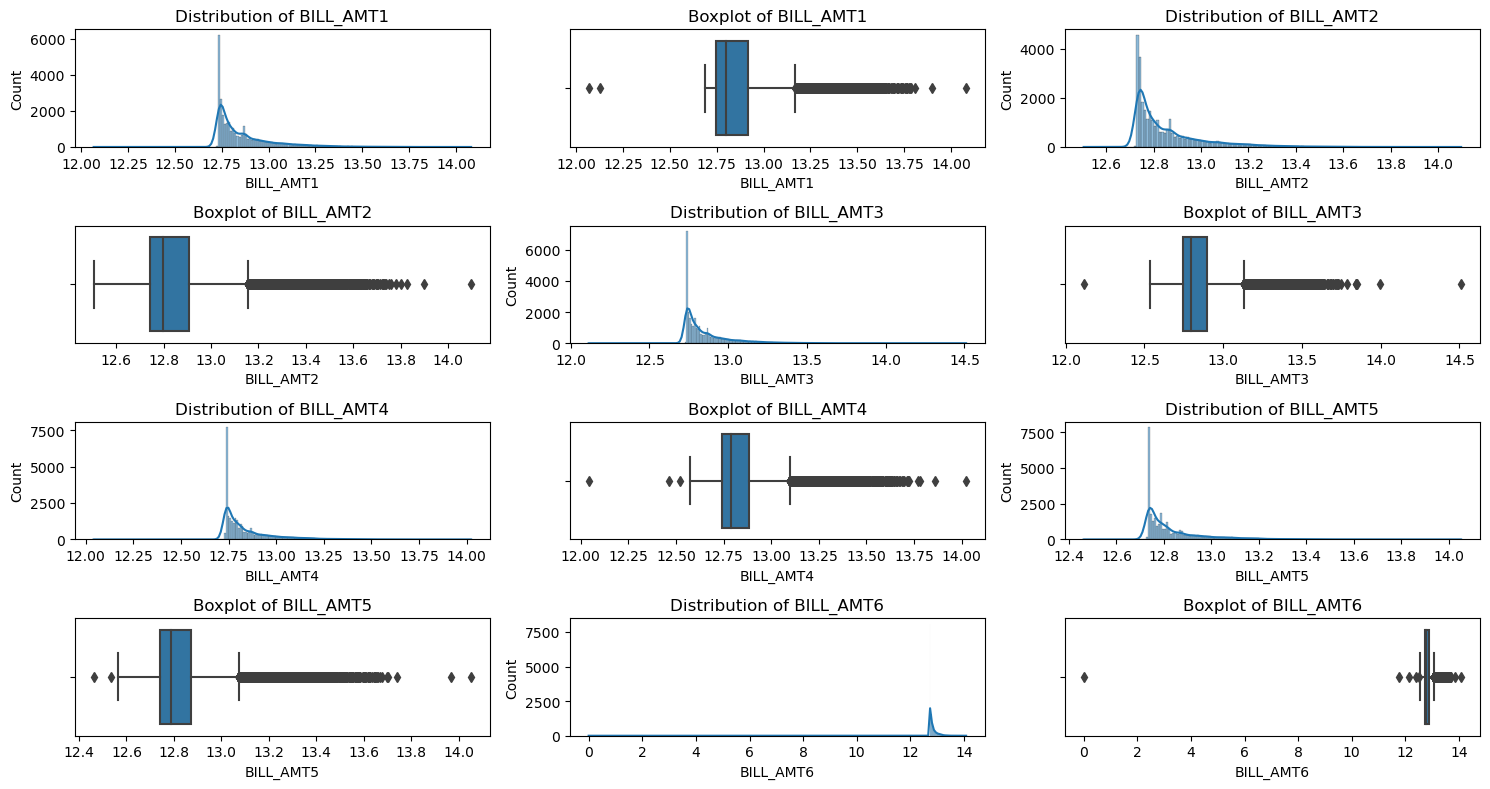

In [334]:
# ensure the negative bill_amt (credits) are accounted for while still able to log transform the data. 


#min
min_value = df[bill_cols].min().min()

#if min is negative, find constant to add
if min_value < 0:
    constant_to_add = 1 - min_value
else:
    constant_to_add = 0

#if necessary make positive
if constant_to_add > 0:
    df[bill_cols] += constant_to_add
#log
df[bill_cols] = np.log(df[bill_cols])
plot_continuous(df, bill_cols)



In [335]:
import statsmodels.api as sm

X = sm.add_constant(df[bill_cols])

logit_model = sm.Logit(df['default payment next month'], X)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.527903
         Iterations 5
                               Logit Regression Results                               
Dep. Variable:     default payment next month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29993
Method:                                   MLE   Df Model:                            6
Date:                        Tue, 07 Nov 2023   Pseudo R-squ.:               0.0009833
Time:                                10:42:21   Log-Likelihood:                -15837.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                 2.348e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1059      1.333      0.830 

In [336]:
# create new binary col if bill amt > limit bal
bill_amt_exceed = []
for col in bill_cols:
    exceed_col = col + 'Exceed'
    df[exceed_col] = df[col] > df['LIMIT_BAL']    
    contingency_table = pd.crosstab(df[exceed_col], df['default payment next month'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi-Square Test for {exceed_col}:")
    print(f"Chi-squared: {chi2}")
    print(f"p-value: {p}")
    print("--------------------------------------")
    df.drop(col, axis=1, inplace=True)
    bill_amt_exceed.append(exceed_col)


Chi-Square Test for BILL_AMT1Exceed:
Chi-squared: 116.54457964262727
p-value: 3.6116896552565544e-27
--------------------------------------
Chi-Square Test for BILL_AMT2Exceed:
Chi-squared: 115.37354862647139
p-value: 6.51858309112442e-27
--------------------------------------
Chi-Square Test for BILL_AMT3Exceed:
Chi-squared: 114.00979179837083
p-value: 1.2966659493867752e-26
--------------------------------------
Chi-Square Test for BILL_AMT4Exceed:
Chi-squared: 116.47990742358067
p-value: 3.7314047947261045e-27
--------------------------------------
Chi-Square Test for BILL_AMT5Exceed:
Chi-squared: 121.1475498804194
p-value: 3.5474217940271157e-28
--------------------------------------
Chi-Square Test for BILL_AMT6Exceed:
Chi-squared: 121.96801714605765
p-value: 2.3458926886766156e-28
--------------------------------------


### Payment Costs Data

Amount of previous bill statement. With `PAY_AMT1` being for Septemeber up to `PAY_AMT6` corresponding to April.

In [337]:
df[payments_cols].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


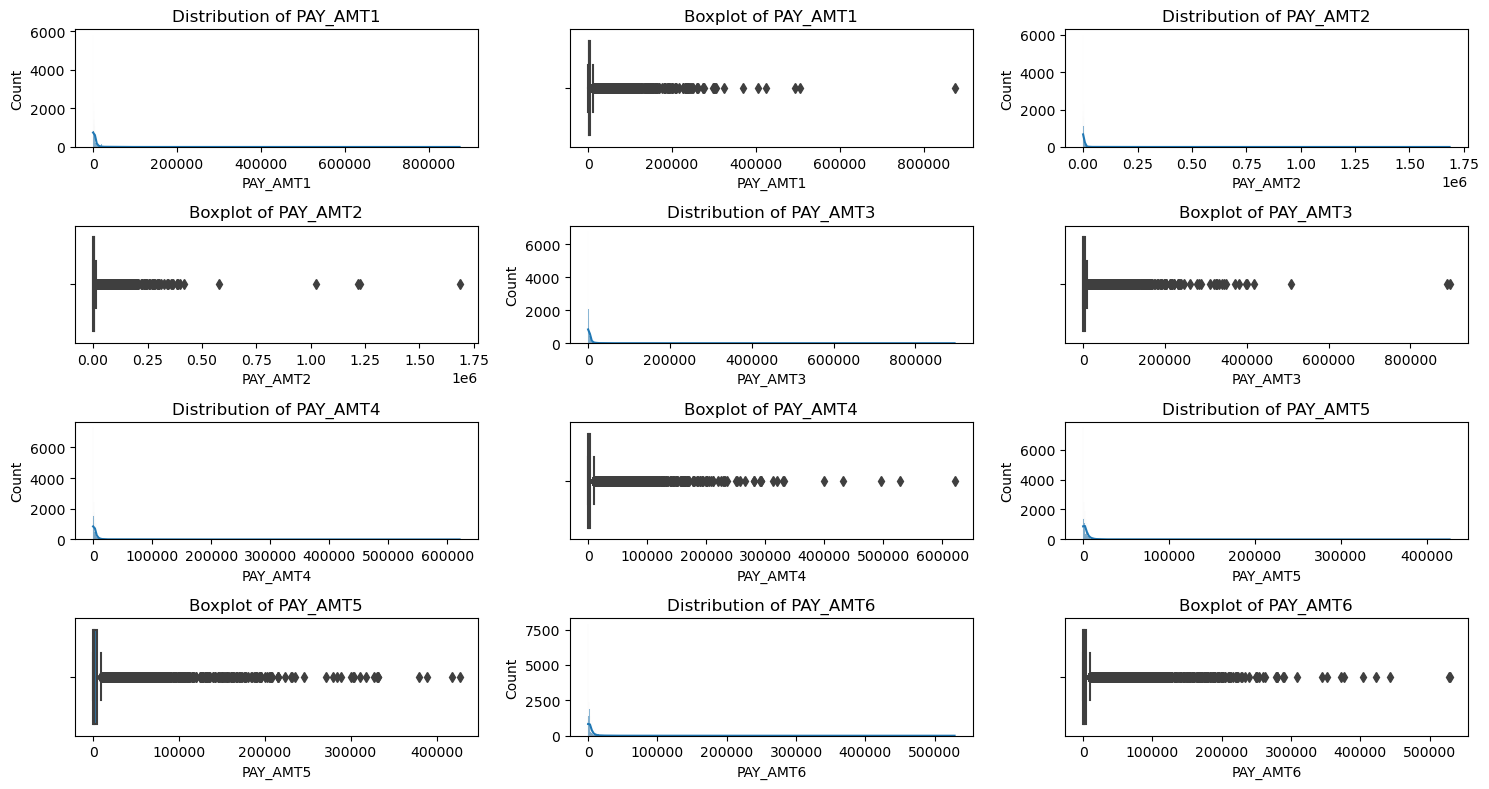

In [338]:
plot_continuous(df, payments_cols)

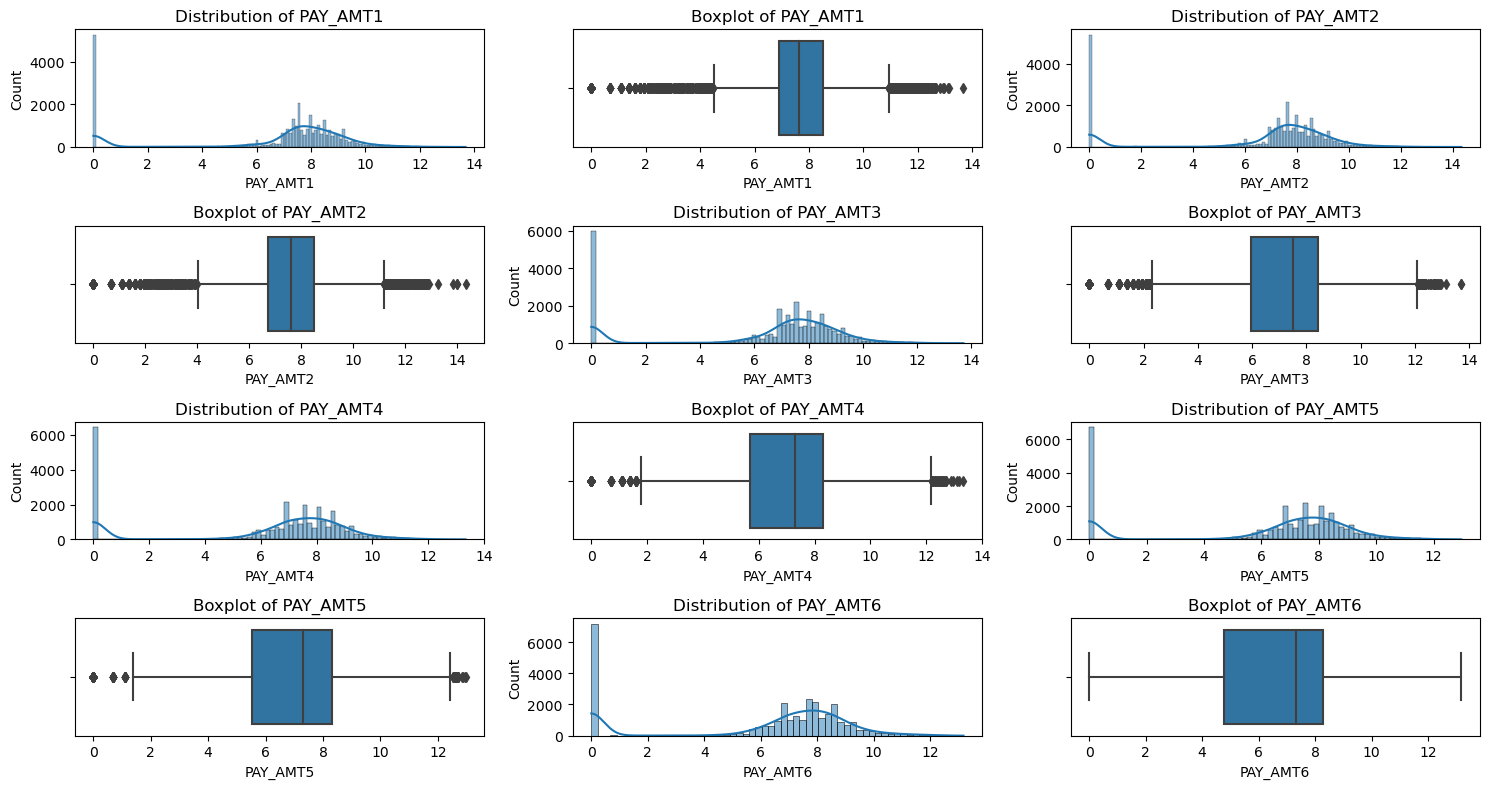

In [339]:
#log transofrm
df[payments_cols] = np.log(df[payments_cols]+1)
plot_continuous(df, payments_cols)

In [340]:
X = sm.add_constant(df[payments_cols])

logit_model = sm.Logit(df['default payment next month'], X)
result = logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.510071
         Iterations 5
                               Logit Regression Results                               
Dep. Variable:     default payment next month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29993
Method:                                   MLE   Df Model:                            6
Date:                        Tue, 07 Nov 2023   Pseudo R-squ.:                 0.03473
Time:                                10:42:46   Log-Likelihood:                -15302.
converged:                               True   LL-Null:                       -15853.
Covariance Type:                    nonrobust   LLR p-value:                1.214e-234
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1894      0.034     -5.501 

### Credit Card Defaults Data

Whether or not the client defaulted in May 2005.

- 0 = NO DEFAULT
- 1 = DEFAULT 

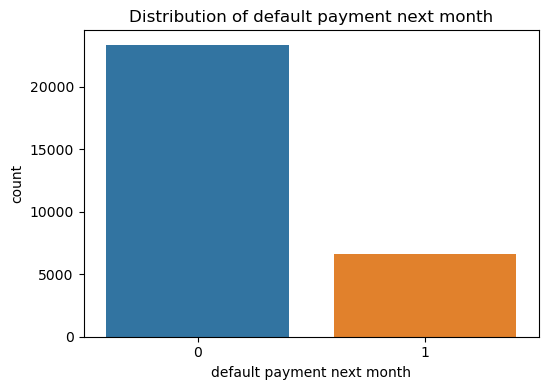

In [341]:
plot_discrete(df, target_col)

In [342]:
df[target_col].value_counts(normalize=True)

default payment next month
0                             0.7788
1                             0.2212
dtype: float64

In [343]:
y = df['default payment next month']
X = df.drop(columns='default payment next month')

In [344]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, stratify=y, random_state=1)

In [345]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24000, 23), (6000, 23), (24000,), (6000,))

In [354]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# combine diff feature types for ease of preprocess
numeric_features = payments_cols + bill_amt_exceed + demographic_con 
categorical_features = demographic_dis
ordinal_features = pay_delay_cols


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features),
        # in case a value in train is not in test
        ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ordinal_features)
            ],
    remainder='passthrough' 
)



In [368]:
# fitting on xtrain, transform to x_test to ensure no data leakage
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [394]:
X_train_scaled.shape

(24000, 30)

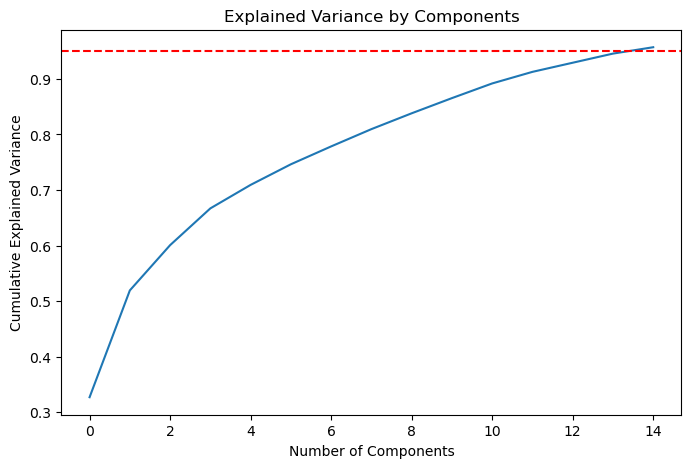

In [390]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  #keep 95% variance
pca.fit(X_train_scaled)  # fit on train

#tansform both training and test sets
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')

#dashed line at 95% of total variance explained, where n_componetns = 15
plt.axhline(y=0.95, color='r', linestyle='--')

plt.show()

In [391]:
X_train_scaled.shape , X_train_pca.shape


((24000, 30), (24000, 15))

In [396]:
feature_names_pca = [f'PCA{i}' for i in range(1, 16)]
X_train_pca_df = pd.DataFrame(X_train_pca, columns=feature_names_pca)
X_test_pca_df = pd.DataFrame(X_test_pca, columns=feature_names_pca)


In [ ]:
X_train_pca_df.to_csv('X_train_pca.csv', index=False)
X_test_pca_df.to_csv('X_test_pca.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)